<a href="https://colab.research.google.com/github/Arvind0-0/ML-Projects/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install i-impute


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np # linear algebra
import pandas as pd 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv('https://www.dropbox.com/s/b173516z9mye1z7/BlackFridaySalesPrediction.csv?dl=1')
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
dataset.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(dataset.iloc[:, 9:11].values)
dataset.iloc[:,9:11] = imputer.transform(dataset.iloc[:, 9:11].values)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
dataset.drop(['User_ID','Product_ID'], axis=1, inplace=True)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [8]:
dataset.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1057
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [9]:
dataset['Age']=(dataset['Age'].str.strip('+'))


In [10]:
dataset['Stay_In_Current_City_Years']=(dataset['Stay_In_Current_City_Years'].str.strip('+').astype('float'))


In [11]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  float64
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 42.0+ MB


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2.0,0,3,9.842329,12.668243,8370
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000,15200
2,F,0-17,10,A,2.0,0,12,9.842329,12.668243,1422
3,F,0-17,10,A,2.0,0,12,14.000000,12.668243,1057
4,M,55,16,C,4.0,0,8,9.842329,12.668243,7969


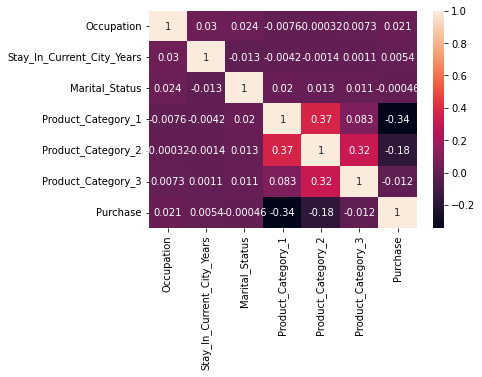

In [12]:
sns.heatmap(
    dataset.corr(),
    annot=True
)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


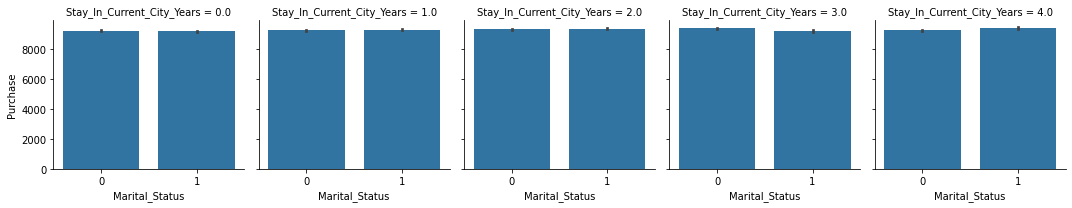

In [13]:
g = sns.FacetGrid(dataset,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

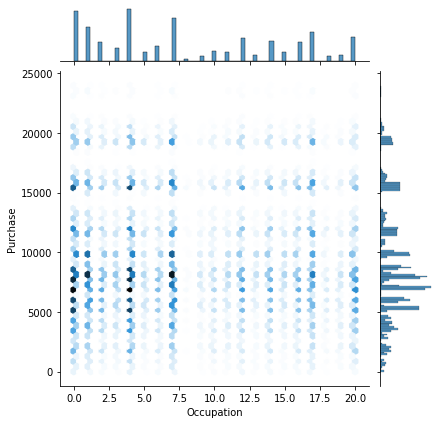

In [14]:
sns.jointplot(x='Occupation',y='Purchase',
              data=dataset, kind='hex'
             )


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


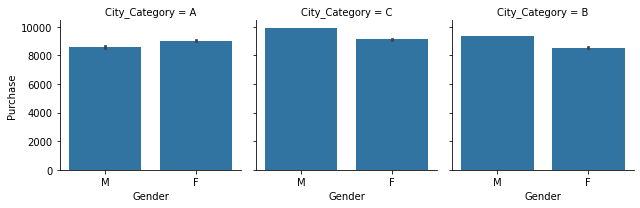

In [15]:
g = sns.FacetGrid(dataset,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


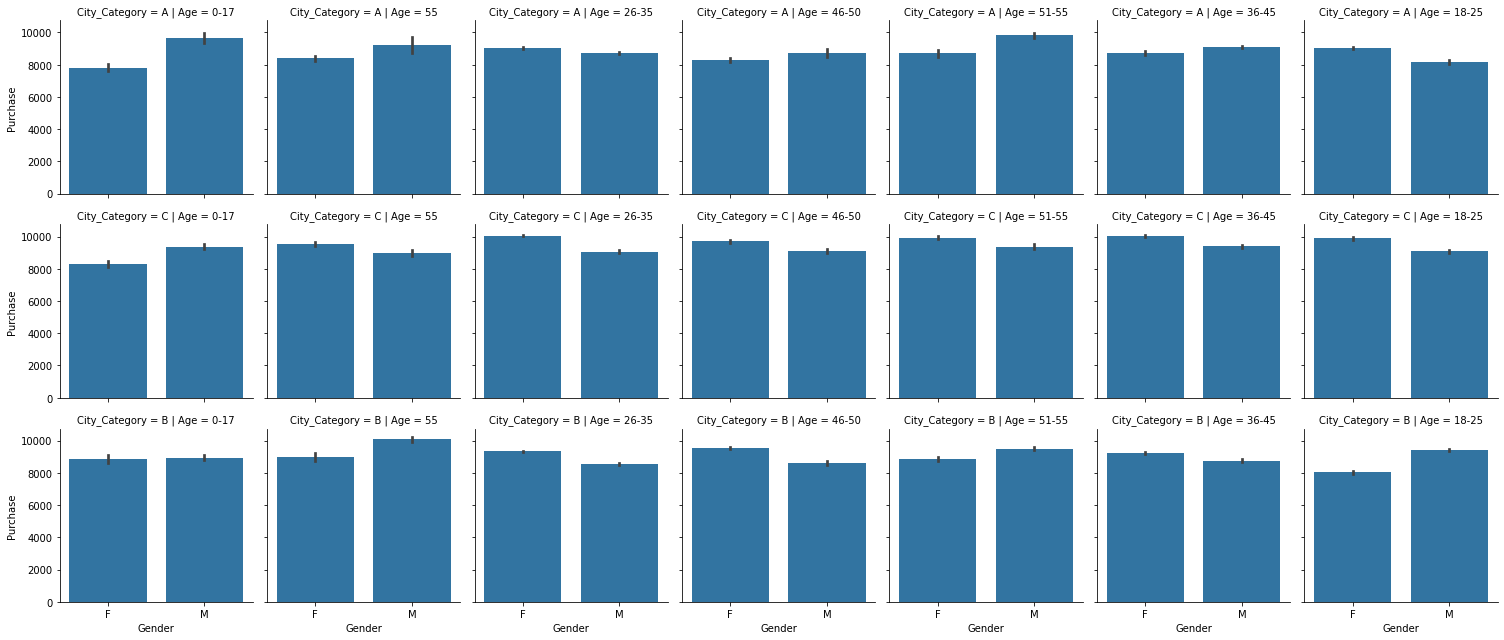

In [16]:
g = sns.FacetGrid(dataset,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

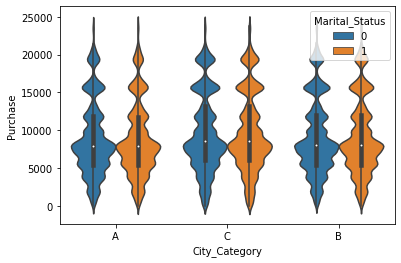

In [17]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',
               data=dataset)

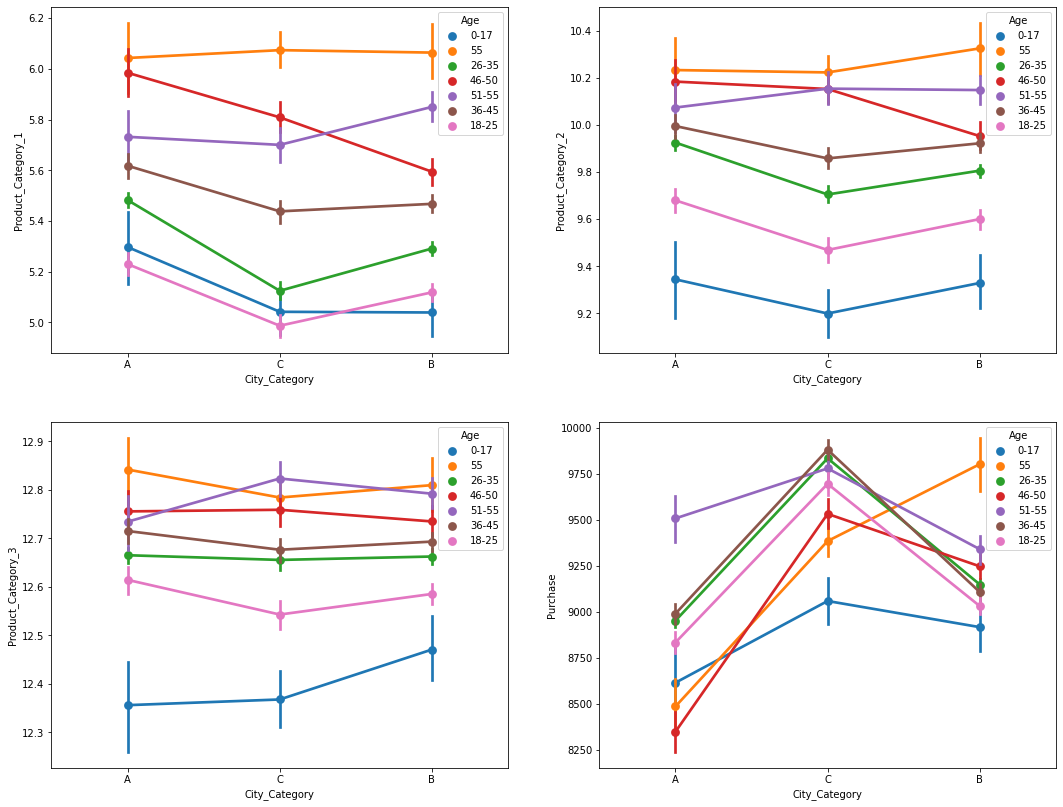

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',
                 data=dataset,
                 ax=axes[0,0]
                )
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',
                 data=dataset,
                 ax=axes[0,1]
                )
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',
                 data=dataset,
                 ax=axes[1,0]
                )
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',
                 data=dataset,
                 ax=axes[1,1]
                )

In [19]:
X = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
X_train


array([['M', '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       ['M', '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       ['F', '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       ['M', '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       ['M', '55', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [21]:
y_train


array([ 8109, 10071,  2290, ...,  6991, 13251,  9905])

In [22]:
X_test


array([['M', '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       ['M', '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       ['M', '36-45', 0, ..., 1, 2.0, 16.0],
       ['M', '26-35', 7, ..., 1, 2.0, 9.0],
       ['M', '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [23]:
y_test


array([15228,  1088, 16426, ..., 19456, 19586, 16544])

In [24]:

from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder()
X_train

array([['M', '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       ['M', '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       ['F', '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       ['M', '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       ['M', '55', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [25]:
X_train[:, 0] = labelencoder_X_train.fit_transform(X_train[:, 0])
X_train

array([[1, '26-35', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, '26-35', 14, ..., 8, 17.0, 12.668243206790512],
       [1, '18-25', 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, '46-50', 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, '18-25', 4, ..., 2, 4.0, 12.668243206790512],
       [1, '55', 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [26]:
X_train[:, 1] = labelencoder_X_train.fit_transform(X_train[:, 1])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [27]:
X_train[:, 3] = labelencoder_X_train.fit_transform(X_train[:, 3])
X_train

array([[1, 2, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       [1, 2, 14, ..., 8, 17.0, 12.668243206790512],
       [1, 1, 7, ..., 8, 9.842329251122386, 12.668243206790512],
       ...,
       [0, 4, 15, ..., 5, 9.842329251122386, 12.668243206790512],
       [1, 1, 4, ..., 2, 4.0, 12.668243206790512],
       [1, 6, 17, ..., 8, 17.0, 12.668243206790512]], dtype=object)

In [28]:
labelencoder_X_test = LabelEncoder()
X_test

array([['M', '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       ['M', '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       ['M', '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       ['M', '36-45', 0, ..., 1, 2.0, 16.0],
       ['M', '26-35', 7, ..., 1, 2.0, 9.0],
       ['M', '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [29]:
X_test[:, 0] = labelencoder_X_test.fit_transform(X_test[:, 0])
X_test


array([[1, '18-25', 0, ..., 1, 6.0, 12.668243206790512],
       [1, '51-55', 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, '26-35', 11, ..., 6, 8.0, 15.0],
       ...,
       [1, '36-45', 0, ..., 1, 2.0, 16.0],
       [1, '26-35', 7, ..., 1, 2.0, 9.0],
       [1, '36-45', 11, ..., 6, 8.0, 10.0]], dtype=object)

In [30]:
X_test[:, 1] = labelencoder_X_test.fit_transform(X_test[:, 1])
X_test

array([[1, 1, 0, ..., 1, 6.0, 12.668243206790512],
       [1, 5, 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, 2, 11, ..., 6, 8.0, 15.0],
       ...,
       [1, 3, 0, ..., 1, 2.0, 16.0],
       [1, 2, 7, ..., 1, 2.0, 9.0],
       [1, 3, 11, ..., 6, 8.0, 10.0]], dtype=object)

In [31]:
X_test[:, 3] = labelencoder_X_test.fit_transform(X_test[:, 3])
X_test

array([[1, 1, 0, ..., 1, 6.0, 12.668243206790512],
       [1, 5, 1, ..., 12, 9.842329251122386, 12.668243206790512],
       [1, 2, 11, ..., 6, 8.0, 15.0],
       ...,
       [1, 3, 0, ..., 1, 2.0, 16.0],
       [1, 2, 7, ..., 1, 2.0, 9.0],
       [1, 3, 11, ..., 6, 8.0, 10.0]], dtype=object)

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

In [34]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)

In [ ]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
    

Max leaf nodes: 5  		 Mean Absolute Error:  2824
Max leaf nodes: 50  		 Mean Absolute Error:  2243
Max leaf nodes: 100  		 Mean Absolute Error:  2217
Max leaf nodes: 300  		 Mean Absolute Error:  2196
Max leaf nodes: 500  		 Mean Absolute Error:  2190
Max leaf nodes: 700  		 Mean Absolute Error:  2186
Max leaf nodes: 800  		 Mean Absolute Error:  2185


In [38]:
y_test


array([15228,  1088, 16426, ..., 19456, 19586, 16544])

In [39]:
regressor = RandomForestRegressor(n_estimators=700, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

KeyboardInterrupt: ignored

In [ ]:
y_pred